<a href="https://colab.research.google.com/github/bgr4ph/bgr4ph/blob/main/notebooks/10_DIFF_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [35, 6]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from copy

In [ ]:
data_all = pd.read_csv('/content/drive/MyDrive/financial-data/KRX-random-ffill.csv')
data_all_date = data_all.set_index('Date')

In [ ]:
data_date_selected = data_all_date.loc['2019-01-01':]

In [ ]:
ss_col = data_date_selected['005930']
sk_col = data_date_selected['000660']

In [ ]:
plt.rcParams["figure.figsize"] = (40,6)

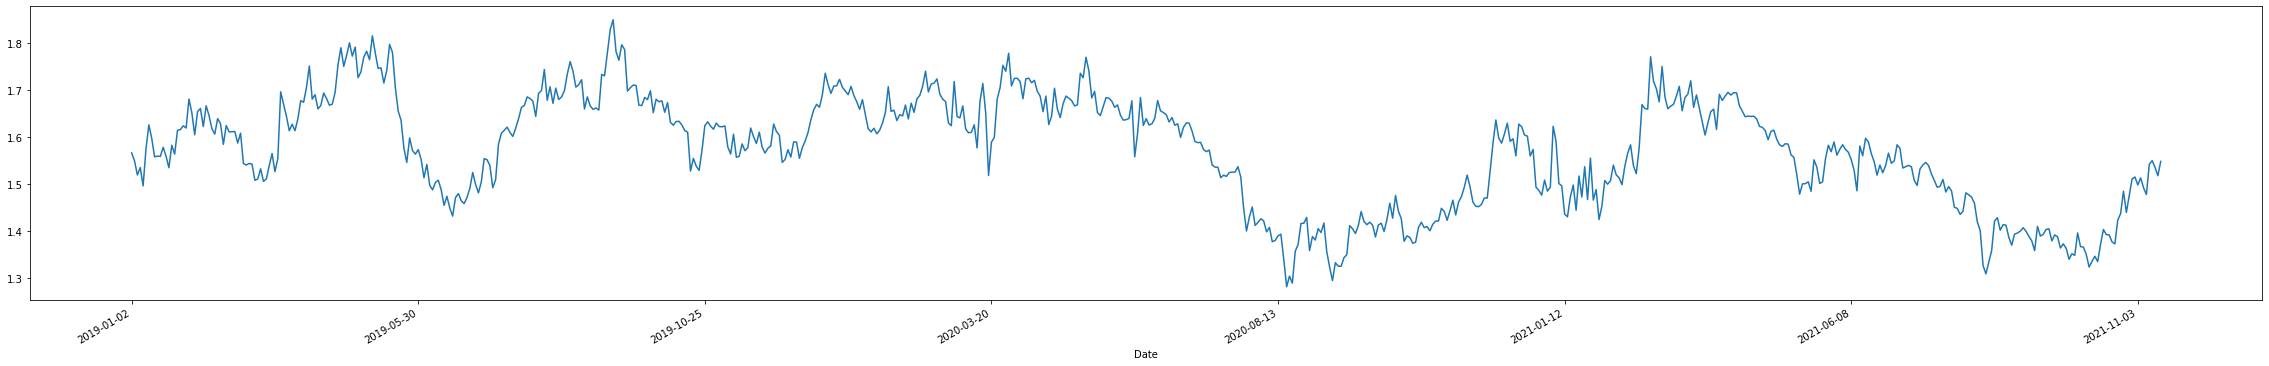

In [ ]:
ax = (sk_col / ss_col).plot()
plt.gcf().autofmt_xdate()
plt.show()
# plt.plot(sk_col / ss_col)

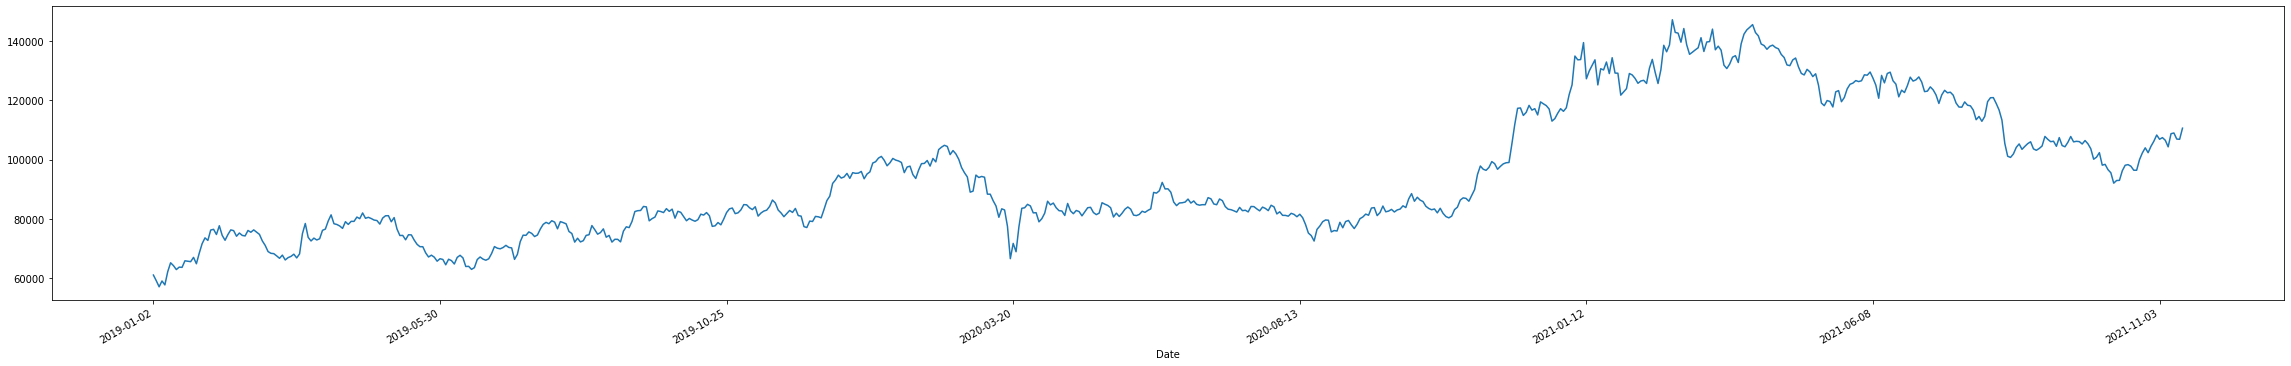

In [ ]:
ax = sk_col.plot()
plt.gcf().autofmt_xdate()
plt.show()
# plt.plot(sk_col)

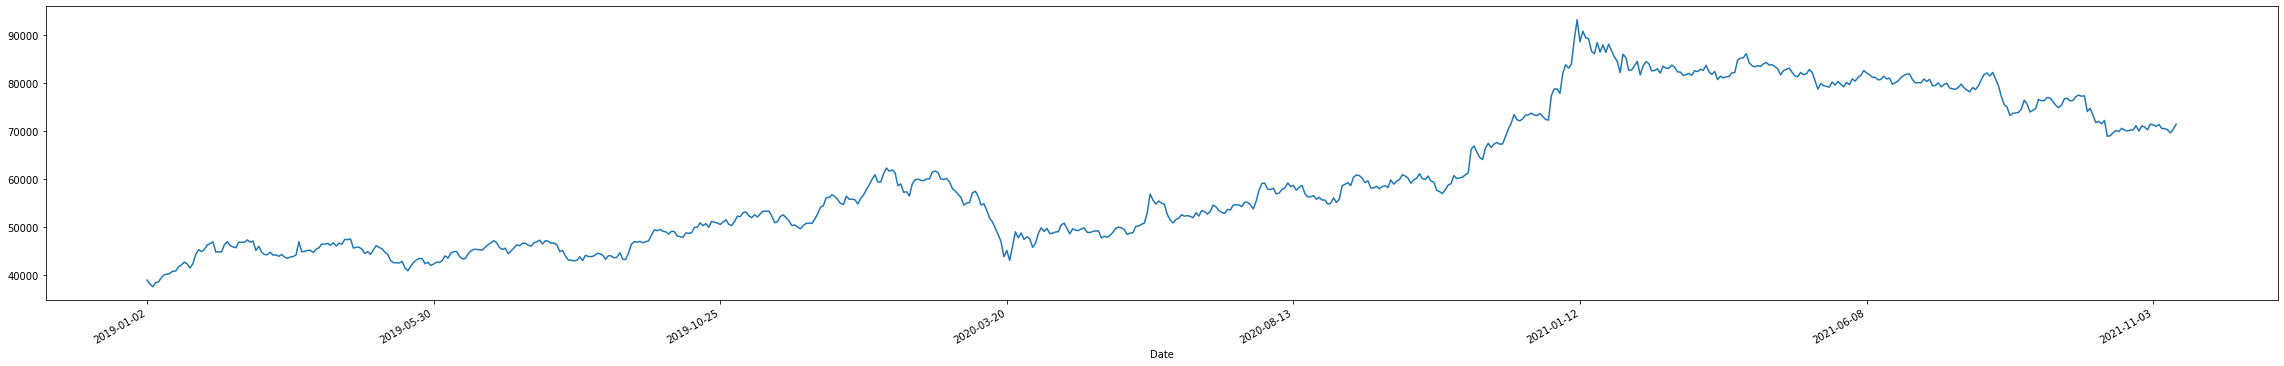

In [ ]:
ax = ss_col.plot()
plt.gcf().autofmt_xdate()
plt.show()
# plt.plot(ss_col)

In [ ]:
# how to find coupled stocks?
# Compared to random stocks

# ratio doesn't change when the two stocks decrease simultaneously
# 이건 지금 비슷하게 움직이는 두 주식 중에 한 주식이 과도하게 내려 갔을 때 매수하는 전략
# lag behind 주식을 매수하여 추격 상승분을 따내는 전략과는 다름
# 일단 두 주식이 비슷하게 움직인다는 것을 증명해야 함 - 그냥 단순하게 correlation?
#

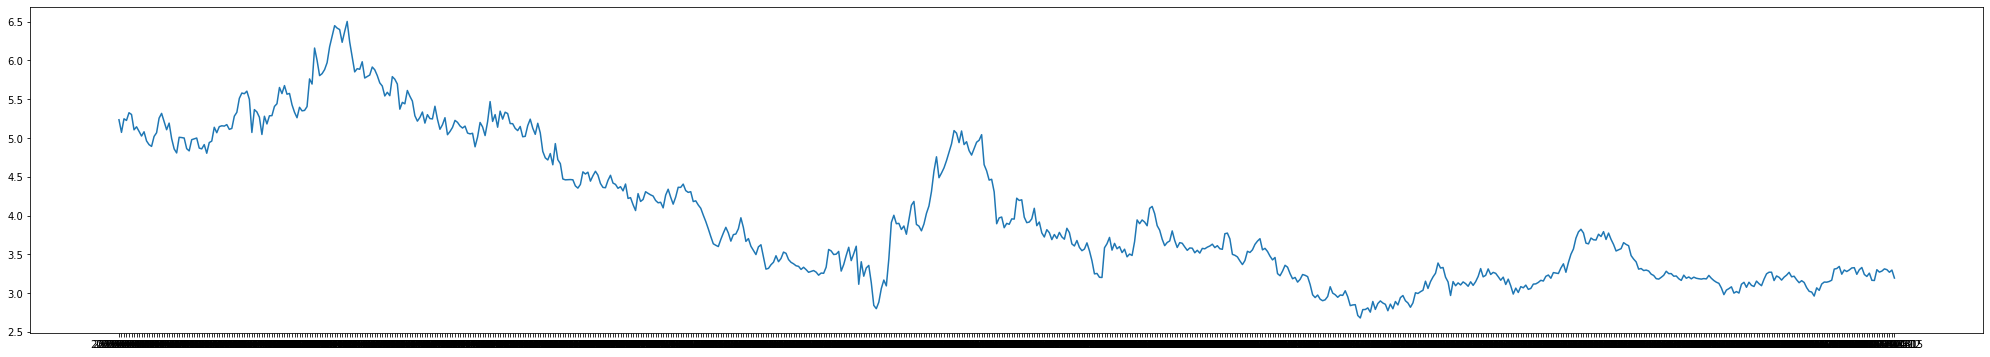

In [ ]:
ss_col = data_date_selected['005930']
dw_col = data_date_selected['006040']
plt.plot(dw_col / ss_col)

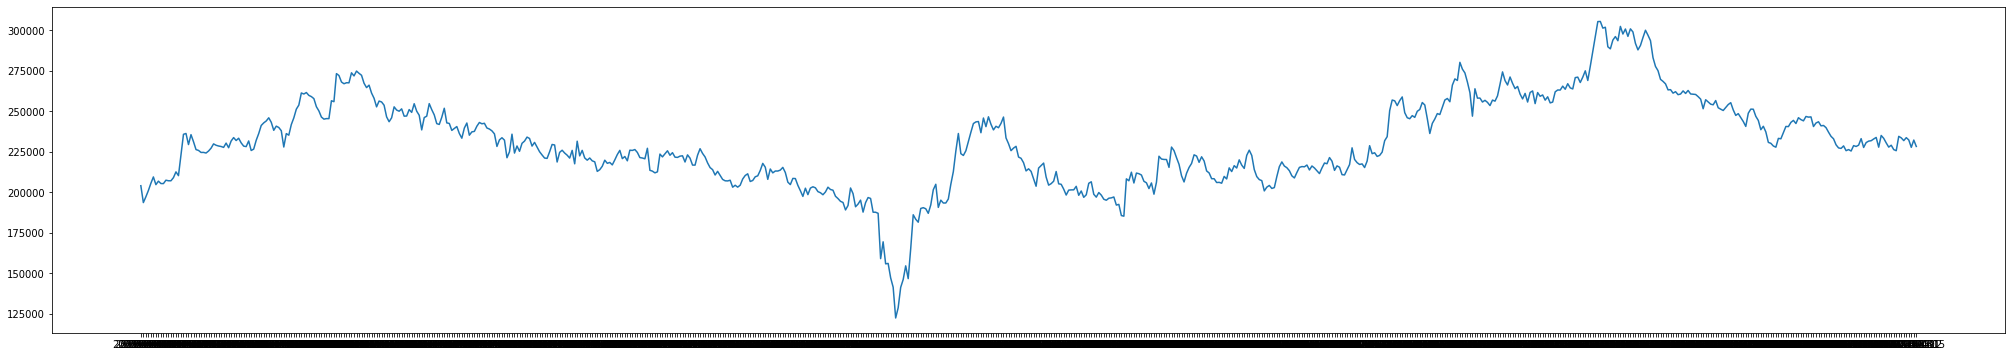

In [ ]:
plt.plot(dw_col)

In [ ]:
print(ss_col.corr(sk_col))
print(ss_col.corr(dw_col))

0.9514081038301454
0.4714561847478706


In [ ]:
info = pd.read_pickle('~/stock/KRX-info-fdr.pkl')

In [ ]:
info[info['Symbol'] == '168330'].iloc[0].Name

'내츄럴엔도텍'

In [ ]:
cols = data_date_selected.columns
for col in cols:
    corr = ss_col.corr(data_date_selected[col])
    if corr > 0.97:
        print(col, info[info['Symbol'] == col].iloc[0].Name)

168300 KTOP 코스피50
278540 KODEX MSCI Korea TR
290130 KBSTAR ESG사회책임투자
237350 KODEX 코스피100
243880 TIGER 200IT레버리지
183710 KBSTAR 주식혼합
139260 TIGER 200 IT
183700 KBSTAR 채권혼합
009150 삼성전기
140950 파워 코스피100
091160 KODEX 반도체
310970 TIGER MSCI Korea TR
520004 미래에셋 전기전자 Core5 ETN
337140 KODEX 코스피대형주
153270 KOSEF 코스피100
285000 KBSTAR 200IT
277540 KINDEX S&P아시아TOP50
322120 KINDEX 스마트퀄리티
292150 TIGER TOP10
156080 KODEX MSCI Korea
298770 KODEX 한국대만IT프리미어
332940 HANARO MSCI Korea TR
005930 삼성전자
266370 KODEX IT
289250 TIGER MSCI KOREA ESG유니버설
005935 삼성전자우
332500 KINDEX 200TR
332930 HANARO 200TR
315960 KBSTAR 대형고배당10TR
091230 TIGER 반도체
122090 ARIRANG 코스피50
2939401A 신한알파리츠 5R
159800 마이티 코스피100
0508901B 쏠리드 17R


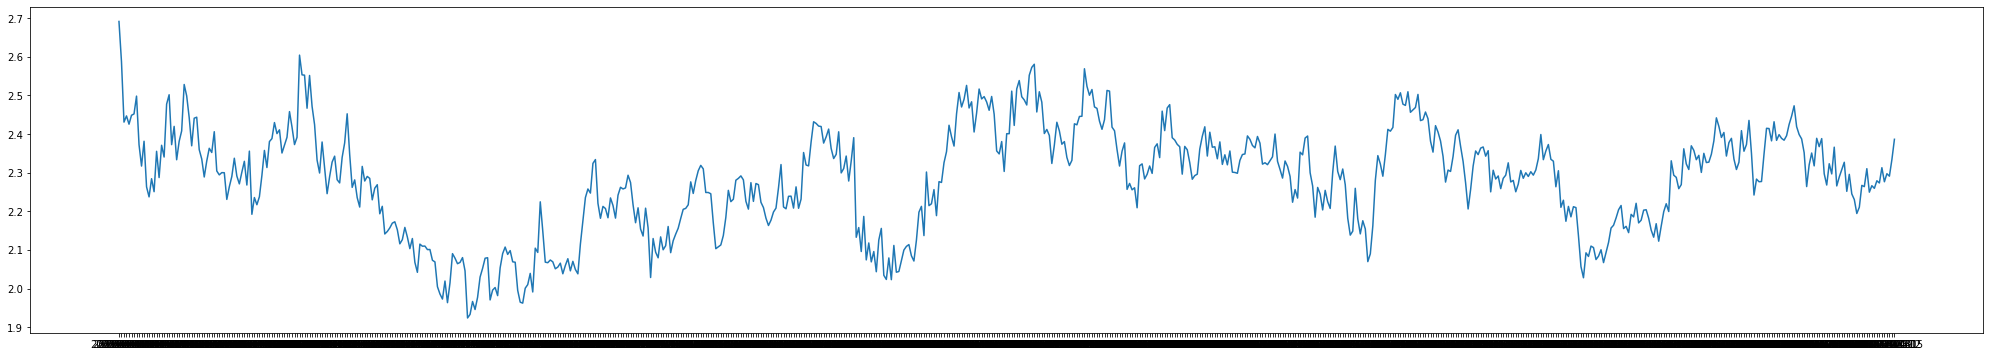

In [ ]:
ss_col = data_date_selected['005930']
se_col = data_date_selected['009150']
plt.plot(se_col / ss_col)

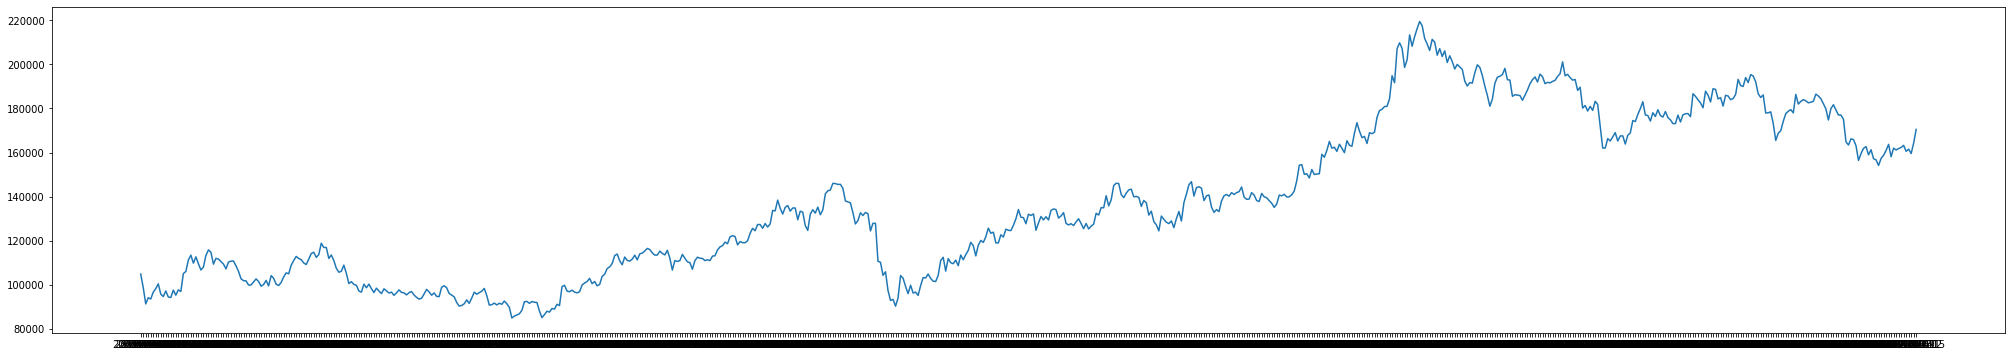

In [ ]:
plt.plot(se_col)

In [ ]:
skss = sk_col/ss_col
skss.mean()

1.5714634806433336

In [ ]:
skss.std()

0.11531915893027125

In [ ]:
skss_mean = skss.mean()
skss_std = skss.std()

In [ ]:
lowpoint = skss_mean - (skss_std * 2)
for i, row in skss.items():
    if row < lowpoint:
        print(i, row)
        

2020-08-18 1.3392186390111935
2020-08-19 1.280878498700087
2020-08-20 1.3036088104351171
2020-08-21 1.288633984979196
2020-09-09 1.322956998516164
2020-09-10 1.2940951903675033
2020-09-11 1.3322075944265999
2020-09-14 1.3247977006443956
2020-09-15 1.324500430058669
2021-08-11 1.326415794628222
2021-08-12 1.3083788986226559
2021-08-13 1.3332556580550123
2021-09-28 1.339555278348585
2021-10-08 1.322957748736985
2021-10-12 1.3349022545118827
2021-10-14 1.3343371825373782
